<a href="https://colab.research.google.com/github/AlexanderVieira/training_datascience/blob/main/Monitor_de_circula%C3%A7%C3%A3o_de_pessoas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path="/content/drive/MyDrive/Graduação/[22GRPEDC02BID401] Data Analytics e Machine Learning em IoT [22E1_4]]/Notebooks/dados/contagem_pessoas_shopping.json"

# Importar módulos necessários para a análise

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime

In [ ]:
sns.set(style="darkgrid", context='talk')

In [ ]:
HOLIDAYS = [
    '01/01/2018',
    '25/01/2018',
    '12/02/2018',
    '13/02/2018',
    '14/02/2018',
    '30/03/2018',
    '21/04/2018',
    '23/04/2018',
    '01/05/2018',
    '31/05/2018',
    '09/07/2018',
    '07/09/2018',
    '12/10/2018',
    #'17/10/2018',
    '02/11/2018',
    '15/11/2018',
    '20/11/2018',
    '24/12/2018',
    '25/12/2018',
    '31/12/2018'
]

BRAZIL_GAMES = [
    '17/06/2018',
    '22/06/2018',
    '27/06/2018',
    '02/07/2018',
    '06/07/2018'
]

def get_holidays():
    return [datetime.strptime(h, "%d/%m/%Y") for h in HOLIDAYS]


def get_brazil_games():
    return [datetime.strptime(b, "%d/%m/%Y") for b in BRAZIL_GAMES]

# Importação dos dados

In [ ]:
data = pd.read_json(path)
data['data'] = pd.to_datetime(data.data)
data

,codigoAcesso,data,divisao,entrada,nomeAcesso,saida
0,5861,2017-09-12 00:30:00-03:00,SHOPPING-TRV,0,ELEVADOR G4,0
1,5861,2017-09-12 01:00:00-03:00,SHOPPING-TRV,0,ELEVADOR G4,0
2,5861,2017-09-12 01:30:00-03:00,SHOPPING-TRV,0,ELEVADOR G4,0
3,5861,2017-09-12 02:00:00-03:00,SHOPPING-TRV,0,ELEVADOR G4,0
4,5861,2017-09-12 02:30:00-03:00,SHOPPING-TRV,0,ELEVADOR G4,0
...,...,...,...,...,...,...
341100,5873,2019-03-12 13:30:00-03:00,SHOPPING-TRV,1868,METRÔ PLATAFORMA,5
341101,5873,2019-03-12 14:00:00-03:00,SHOPPING-TRV,2119,METRÔ PLATAFORMA,5
341102,5873,2019-03-12 14:30:00-03:00,SHOPPING-TRV,2321,METRÔ PLATAFORMA,6
341103,5873,2019-03-12 15:00:00-03:00,SHOPPING-TRV,2321,METRÔ PLATAFORMA,6


## Filtring data for 2018

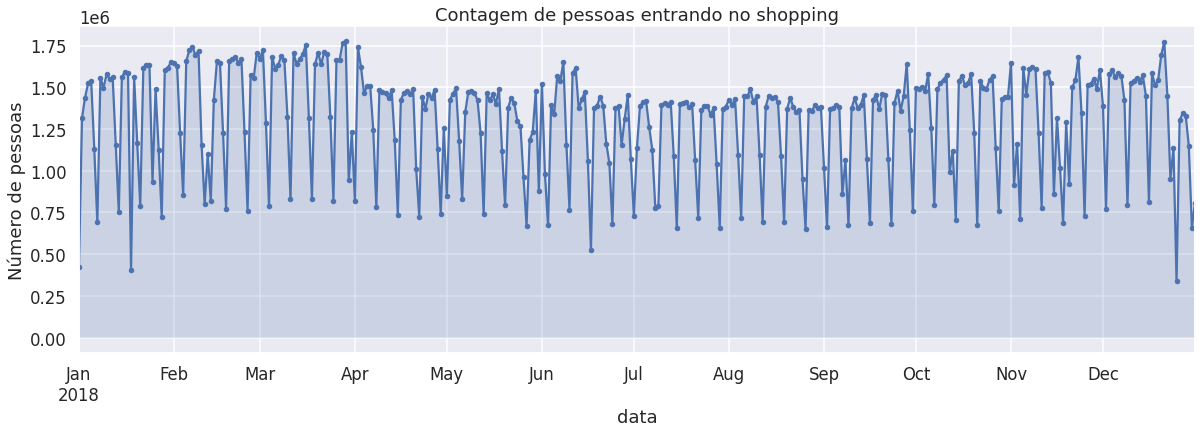

In [ ]:
df = data.groupby('data')[['entrada', 'saida']].sum()
df = df[df.index.year == 2018]
df = df.resample('1D').sum()


fig, ax = plt.subplots(1, 1, figsize=(20, 6))
df.entrada.plot(ax=ax, marker='.')
ax.fill_between(df.index, df.entrada, alpha=.2)
ax.set_ylabel("Número de pessoas")
ax.set_title("Contagem de pessoas entrando no shopping");

## Realizar a decomposição da série temporal

In [ ]:
result = seasonal_decompose(df.entrada, model="multiplicative")

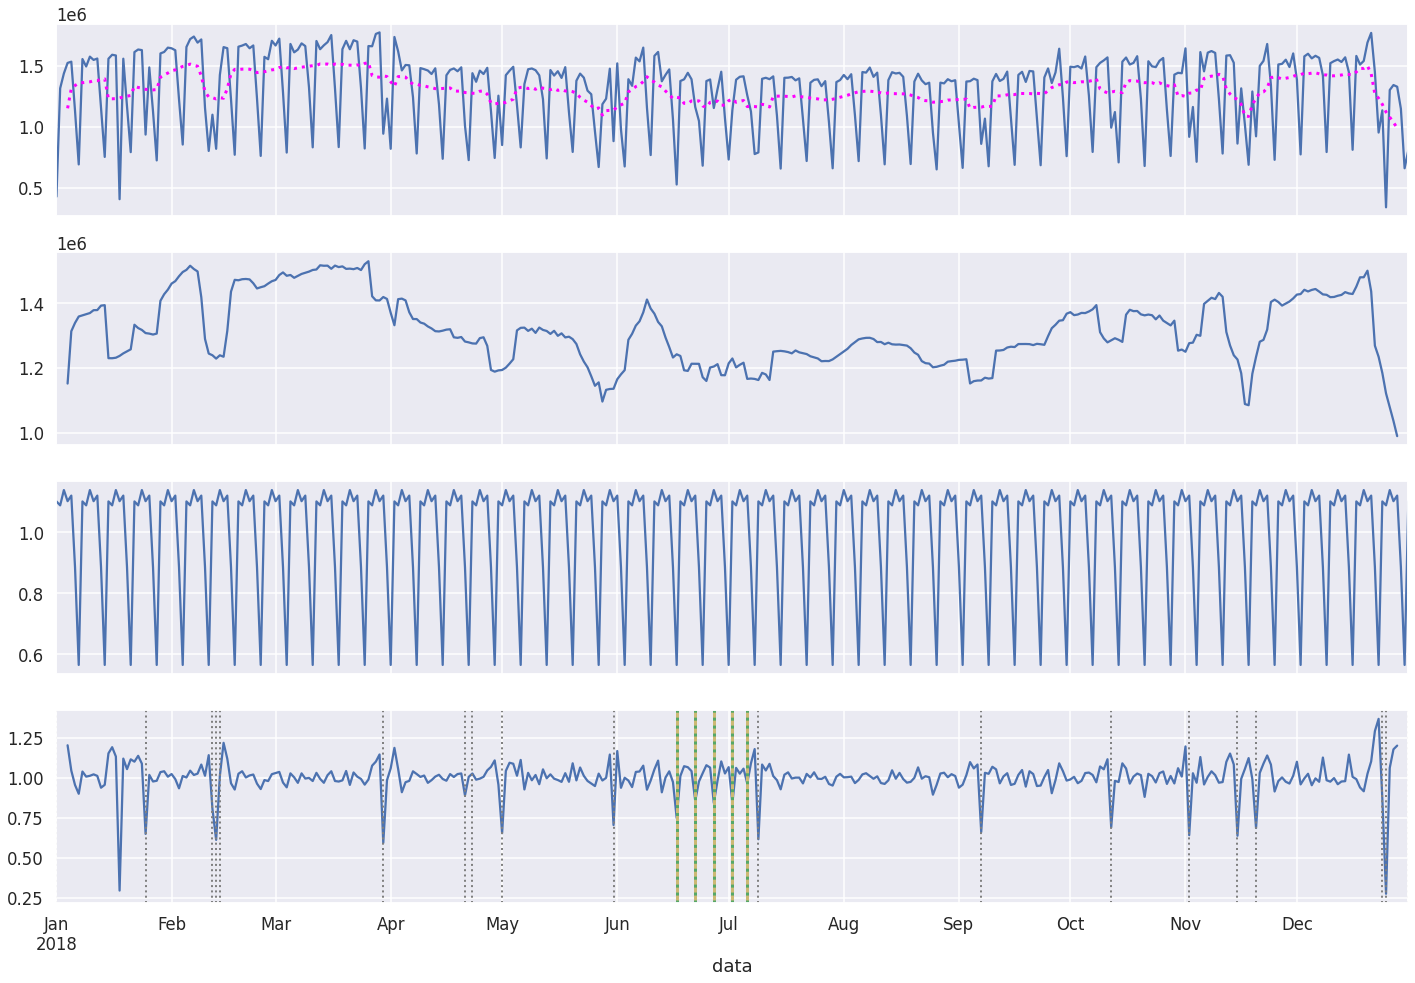

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(20, 14), sharex=True)

# Observed
df.entrada.plot(ax=axes[0])
result.trend.plot(ax=axes[0], color='magenta', linestyle=":", linewidth=3)

# Trend
result.trend.plot(ax=axes[1])

# Seasonal
result.seasonal.plot(ax=axes[2])

# Resid
result.resid.plot(ax=axes[3])
for holiday in get_holidays():
    axes[3].axvline(x=holiday, c='gray', lw=2, ls=':')

for game_day in get_brazil_games():
    axes[3].axvline(x=game_day, c='y', lw=3)
    axes[3].axvline(x=game_day, c='g', lw=3, ls=':')

fig.tight_layout()

In [ ]:
WEEKDAYS = 7

data_people = df.entrada.values
data_people = np.append(data_people, np.array(6 * [np.NAN]))

n_rows = data_people.shape[0] // WEEKDAYS
matrix = data_people.reshape(  n_rows, WEEKDAYS)

In [ ]:
rows, cols = np.indices((n_rows, WEEKDAYS))
SCALE = 350
sizes = SCALE * matrix.ravel() / np.nanmax(matrix.ravel())

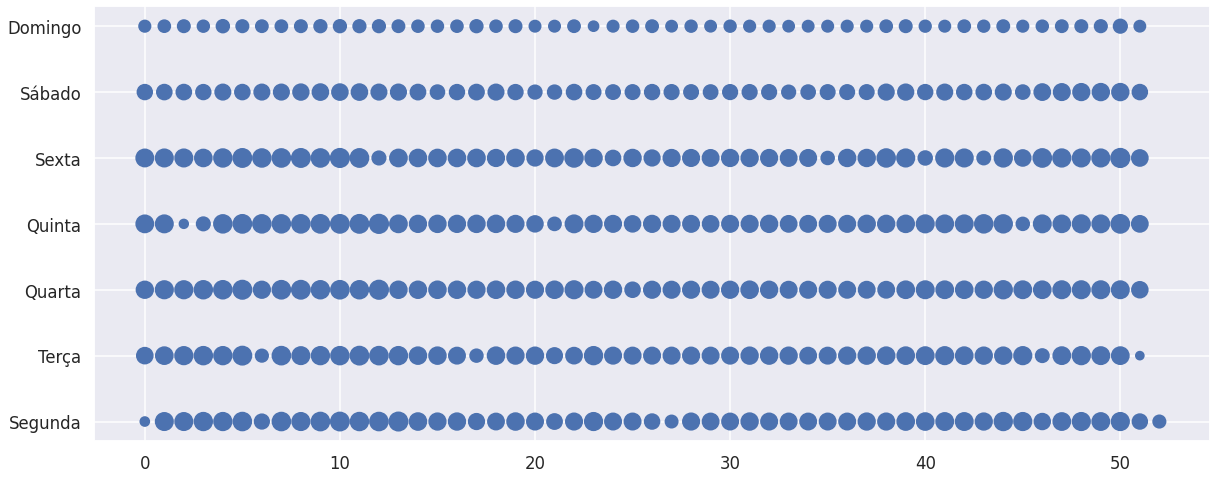

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
ax.scatter(rows, cols, s=sizes)

ax.set_yticks(range(7))
ax.set_yticklabels(['Segunda',
                    'Terça',
                    'Quarta',
                    'Quinta',
                    'Sexta',
                    'Sábado',
                    'Domingo']);